In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import stochastic_plots as stoch
import examen_ordinaria_PE_2020_2021_plantilla_2 as pe
import BM_simulators as simu
import sde_solvers as sde
# Author of the exam: <alberto.suarez@uam.es>
# Filled by <fjaviersaezm@mail.com>


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1: Simulation of a Continuous-time Markov Chain

## Continuous-time Markov Chain

Consider the following CTMC

![CTMC](media/CTMC.png)

With $\lambda_1 = 2,\lambda_2 = 1, \lambda_3 = 3$.

a) Write the transition matrix for the subjacent jump process

This is straightforward 

$$
\mathbf{\tilde P} = \begin{pmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
\frac{1}{2} & \frac{1}{2} & 0
\end{pmatrix}
$$

b) Derivate the stationary distribution for the jump process

To do this, we must find the left eigenvector with eigenvalue 1, that is:

$$
\begin{pmatrix}\tilde \pi_1 & \tilde \pi_2 & \tilde \pi_3 \end{pmatrix} \begin{pmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
\frac{1}{2} & \frac{1}{2} & 0
\end{pmatrix} = \begin{pmatrix}\tilde \pi_1 & \tilde \pi_2 & \tilde \pi_3 \end{pmatrix}
$$

We have to solve this system of linear equations. It is easy to see that

$$
\begin{cases}
\tilde \pi_1 = \frac{1}{2} \tilde \pi_3 \\
\tilde \pi_2 = \tilde \pi_1 + \frac{1}{2} \tilde \pi_3\\
\tilde \pi_3 = \tilde \pi_2
\end{cases}
$$
And use the extra condition that $\tilde \pi_1 + \tilde \pi_2 + \tilde \pi_3 $. If we solve this system we obtain that the stationary distribution of the jump chain is 
$$
\mathbf{\tilde \pi} = \begin{pmatrix}\tilde \pi_1 & \tilde \pi_2 & \tilde \pi_3 \end{pmatrix}  = \begin{pmatrix} \frac{1}{5} & \frac{2}{5}&\frac{2}{5} \end{pmatrix}
$$

c) Derivate the stationary distribution for the original CTMC

We now have to use the jump rates $\lambda_i$ to obtain the stationary distribution. We know that

$$
\pi_1 \propto \frac{\tilde \pi_1}{\lambda_1} = \frac{1}{10} = \frac{3}{30} \\
$$
$$
\pi_2 \propto \frac{\tilde \pi_2}{\lambda_2} = \frac{2}{5} = \frac{12}{30} \\
$$
$$
\pi_3 \propto \frac{\tilde \pi_3}{\lambda_3} = \frac{2}{15} = \frac{4}{30} \\
$$

And we have to normalize using $\pi_1 + \pi_2 + \pi_3 = 1$ to obtain the stationary distribution of the CTMC, obtaining

$$
 \mathbf{\pi} = \begin{pmatrix} \pi_1 &  \pi_2 &  \pi_3 \end{pmatrix}  = \begin{pmatrix} \frac{3}{19} & \frac{12}{19}&\frac{4}{19} \end{pmatrix}
$$

d) Derivate the associated infinitesimal generator

We know that in a CTMC, the infinitesimal generator is given by

$$
g_{ij} = 
\begin{cases}
\lambda_i p_{ij} & i \neq j\\
-\lambda _i & i = j
\end{cases}.
$$
Hence, our infinitesimal generator is

$$
\mathbf{G} = \begin{pmatrix}
-2 & 2 & 0 \\
0 & -1 & 1 \\
\frac{3}{2} & \frac{3}{2} & -3
\end{pmatrix}
$$

e) Now, derivate the stationary distribution from infinitesimal generator and compare it with the last result.

We can now use the proposition that states that in a CTMC with stationary distribution $\pi$ and infinitesimal generator $G$, 
$$\pi^T G = 0$$.

In our case, we have to solve the following homogeneous system:

$$
\begin{pmatrix}\pi_1 & \pi_2 & \pi_3 \end{pmatrix}\begin{pmatrix}
-2 & 2 & 0 \\
0 & -1 & 1 \\
\frac{3}{2} & \frac{3}{2} & -3
\end{pmatrix} = \mathbf{0} \Longrightarrow 
\begin{cases}
-2 \pi_1   + 2 \pi_2 = 0\\
- \pi_2 + \pi_3 = 0\\
\frac{3}{2} \pi_1 + \frac{3}{2} \pi_2 - 3 \pi_3 = 0
\end{cases}
$$

Which has the solution

$$
 \mathbf{\pi} = \begin{pmatrix} \pi_1 &  \pi_2 &  \pi_3 \end{pmatrix}  = \begin{pmatrix} \frac{3}{19} & \frac{12}{19}&\frac{4}{19} \end{pmatrix}
$$

as we expected.

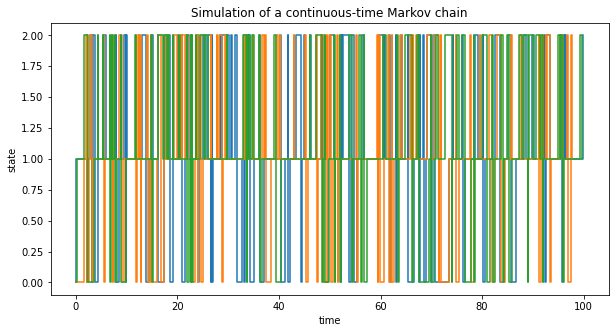

In [2]:

transition_matrix = [[  0,   1, 0], 
                      [  0,   0, 1],
                      [1/2, 1/2, 0]]
lambda_rates = [2, 1, 3]
t0 = 0.0
t1 = 100.0
state_0 = 0
# Simulate and plot a trajectory.
M = 3 # Number of simulations
N = 100 # Time steps per simulation
arrival_times_CTMC, trajectories_CTMC = (
     pe.simulate_continuous_time_Markov_Chain(
     transition_matrix, lambda_rates, 
     state_0, M, t0, t1))
fig, ax = plt.subplots(1, 1, figsize=(10,5), num=1)

for i in range(M):
    ax.step(arrival_times_CTMC[i], 
             trajectories_CTMC[i],
             where='post')

ax.set_ylabel('state')
ax.set_xlabel('time')
_ = ax.set_title('Simulation of a continuous-time Markov chain')



In [3]:
from collections import Counter

# Stationary distribution of the jump process from a single trajectory
M = 1 # Number of simulations
N = 100000 # Time steps per simulation
arrival_times_CTMC, trajectories_CTMC = (
     pe.simulate_continuous_time_Markov_Chain(
     transition_matrix, lambda_rates, 
     state_0, M, t0, t1))

traj = trajectories_CTMC[0]

counts = Counter(traj)

probs = np.array([counts[key] for key in counts.keys()])/len(traj)

theo_jump = np.array([1/5, 2/5, 2/5])

print("Theoretical Stationary distribution of jump chain {}".format(theo_jump))
print("Empirical Stationary distribution of jump chain {}".format(probs))

Theoretical Stationary distribution of jump chain [0.2 0.4 0.4]
Empirical Stationary distribution of jump chain [0.22972973 0.38513514 0.38513514]


In [4]:
# Stationary distribution of the CTMC from a single trajectory

times = arrival_times_CTMC[0]

times_i = np.array([0.0,0.0,0.0])

for i in range(len(times)-1):
    times_i[traj[i]] += times[i+1] - times[i] 
    
distr = times_i/t1

theo_ctmc = np.array([3/19, 12/19, 4/19])

print("Theoretical Stationary distribution of CTMC chain {}".format(theo_ctmc))
print("Stationary distribution of the CTMC chain {}".format(distr))

Theoretical Stationary distribution of CTMC chain [0.15789474 0.63157895 0.21052632]
Stationary distribution of the CTMC chain [0.20241407 0.57560227 0.2188695 ]


In [5]:
from operator import itemgetter
# Stationary distribution of the CTMC from the final state in a sample of M trajectories
# Simulate and plot a trajectory.
M = 1000 # Number of simulations
arrival_times_CTMC, trajectories_CTMC = (
     pe.simulate_continuous_time_Markov_Chain(
     transition_matrix, lambda_rates, 
     state_0, M, t0, t1))


final_states = [traj[-1] for traj in trajectories_CTMC]

counts = Counter(final_states)

counts = sorted(counts.items(), key=itemgetter(0))

probs = np.array([counts[i][1] for i in range(3)])/M


print("Empirical Stationary distribution of CTMC chain {}".format(probs))

Empirical Stationary distribution of CTMC chain [0.164 0.621 0.215]


h)

## Exercise 2: Simulation of a Brownian bridge process

### Expected value of the standard Wiener process

Consider the expression for the standard Brownian bridge
$$ 
BB_{std}(t) = W(t) - W(1) \, t 
$$

The mean of this process is
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = \mathbb{E}\left[ W(t) - W(1) \, t \right]
$$
The expected value operator is linear. Therefore, 
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = \mathbb{E}\left[ W(t) \right] - \mathbb{E}\left[ W(1) \right] t.
$$
Since process $W(t)$ has zero mean $\mathbb{E}\left[ W(t) \right] = 0, \ \forall t \ge 0$
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = 0, \quad \forall t \in \left[0, 1 \right].
$$

### Covariance function for the standard Brownian bridge

The covariance function for the standard Brownian bridge is defined as
$$ 
\gamma(t,s) = 
 \mathbb{E} \left[\left(BB_{std}(s) - \mathbb{E}\left[ BB_{std}(s) \right] \right)  \left(BB_{std}(t) \right] - \mathbb{E}\left[ BB_{std}(t) \right] \right). 
$$ 
Using 
$$ 
BB_{std}(t) = W(t) - W(1) \, t, \quad \mathbb{E}\left[ BB_{std}(t) \right] = 0
,$$ 
and 
$$
\gamma(s, t) = 
 \mathbb{E} \left[ \left(W(s) - W(1) \, s \right) \left(W(t) - W(1) \,  t \right)\right] =
 \mathbb{E} \left[ W(s) W(t) \right]  + \mathbb{E} \left[W^2(1)\right] s t - \mathbb{E} \left[W(1) W(t)\right] \, s 
- \mathbb{E} \left[W(s) W(1) \right]  \, t. 
$$ 
Finally, taking into account that
$$ 
\mathbb{E}\left[ W(s) W(t) \right] = \min(s, t), $$ 
one gets 
$$ 
\gamma(s, t) =  \min(s, t) + s t - t s - s t = \min(s, t) - s t. 
$$ 


### Mean function for a general Brownian bridge

### Covariance function for a general Brownian bridge

In [14]:
## Brownian bridge simulation
t0 = 4.0
t1 = 7.0
BB0 = 4.0
BB1 = 7.0
tref = 5.3
N = 100
M = 1000
sigma = 2.0

t, BB = simu.simulate_Brownian_bridge(t0,BB0,t1,BB1, sigma, M,N)



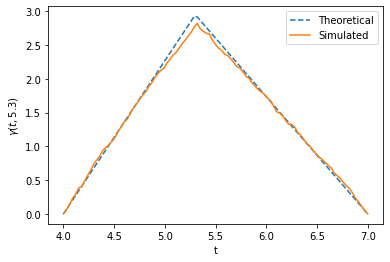

In [15]:
cov = pe.estimate_covariance(BB,t,fixed_t = tref)

# Theoretical autocovariance function
def theoretical_cov(t, s, sigma, t1, t0):
    return sigma**2 * (np.minimum(t-t0, s-t0) - ((s-t0)*(t-t0))/(t1-t0))


plt.plot(t, theoretical_cov(t, tref, sigma, t1, t0), "--",
         label="Theoretical")
plt.plot(t, cov, label="Simulated")
plt.xlabel("t")
plt.ylabel(r"$\gamma(t, 5.3)$")
plt.legend()
_ = plt.show()

# Exercise 3: Simulation of a stochastic volatility model

a) Write the differential stochastic equation for $X(t) = \sigma(T) - \sigma_\infty$.

We only have to derivate

$$
d X(t) = d(\sigma(t) - \sigma_\infty) = d\sigma(t) = -\alpha(\sigma(t) - \sigma_\infty)dt + \xi dW(t), \quad \alpha > 0
$$
and also use the initial condition
$$
X(t_0) = \sigma(t_0) - \sigma_\infty = \sigma_ 0 - \sigma_\infty
$$

b) From this SDE, derivate an ODE for $E[X(t)]$ and obtain, by the variable separation method, for a process that matches the last initial condition

$$
d \ \mathbb E[X(t)] = \mathbb E [ d \ X(t) ] = 
$$

### Derivation of $\mathbb{E}\left[\sigma(t)\right]$

### Derivation of $\text{Var}\left[\sigma(t)\right]$

### Derivation of the conditional pdf:  $\text{pdf}\left[\left.  t, \sigma(t) \right| t_0, \sigma_0 \right]$

### Simulation of the SDE $
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$


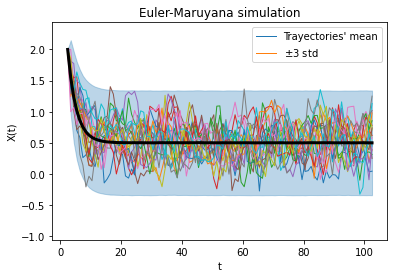

In [27]:
# Simulation of a sample of trajectories

M = 100000
N = 100
t0 = 2.5
T = 100.0
sigma0 = 2.0
sigmainf = 0.5
alpha = 0.3
xi = 0.2

a = lambda t,sigma: -alpha*(sigma - sigmainf)
b = lambda t,sigma: xi

t,S = pe.euler_maruyana(t0,sigma0,T,a,b,M,N)

y_max = min(np.max(S), 3000)


stoch.plot_trajectories(t, S, fig_num=1)

sde.subplot_mean_and_std(t, np.mean(S, axis=0),
                         3*np.std(S, axis=0), # 99% is 3 times std
                         ylims=[np.min(S), y_max],
                         color='black')
plt.legend(['Trayectories\' mean', '$\pm$3 std'])
_ = plt.title('Euler-Maruyana simulation')

In [9]:
# Mean and stdev of the trajectories simulated           
                              

In [10]:
# Asymptotic stationary pdf of the process

# Exercise 4: Pricing of a European call option

## Pricing by quadrature

In [11]:
# Parameters that characterize underlying 
S0 = 100.0
sigma = 0.3

# Parameters of the EU call option
K = 90.0
T = 2.0

# Risk-free interest rate
r = 0.05

price_EU_call = pe.price_EU_call(S0, K, r, sigma, T)

print('Price = {:.4f}'.format(price_EU_call))

Price = 26.2402


## Monte Carlo pricing of a European call option

# 3-C

Consider the Ito SDE
$$
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$$
where $\alpha > 0$ is the reversion rate, $\xi > 0$ is the volatility of the stochastic process $\sigma(t)$. 

Define the process $X(t) = \sigma(t) - \sigma_{\infty}$. Since $ \sigma_{\infty} $ is constant, $dX(t) = d \sigma(t)$, and the equation becomes
$$
d X(t) = - \alpha X(t) dt + \xi dW(t).
$$


Let's take the expected value on both sizes of the equation 
$$
\mathbb{E}\left[dX(t) \right] = \mathbb{E}\left[ - \alpha  X(t) dt + \xi  dW(t) \right].
$$

Using the fact that the expected value is a linear operator, we get
$$
d\mathbb{E} \left[X(t) \right] = - \alpha \mathbb{E}\left[ X(t) \right] dt + \xi \mathbb{E}\left[ dW(t) \right].
$$
Since the Wiener process has zero mean, the equation becomes 
$$
d \mathbb{E} \left[ X(t) \right] = - \alpha  \mathbb{E} \left[ X(t) \right] dt.
$$
Using the method of separation of variables
$$
\frac{1}{ \mathbb{E} \left[ X(t) \right]} d \mathbb{E} \left[ X(t) \right] = - \alpha dt,
$$
the equation can be integrated between $(t_0, X_0)$, where $X_0 = \sigma_0 - \sigma_{\infty}$, and $\left(t,  \mathbb{E} \left[ X(t) \right] \right)$
$$
\int_{X_0}^{\mathbb{E} \left[ X(t) \right]} \frac{1}{ \mathbb{E} \left[ X \right]} d \mathbb{E} \left[ X \right]  = - \alpha \int_{t_0}^t d\tau. 
$$
The solution is
$$
\log \frac{ \mathbb{E}\left[X(t) \right] }{ X_0 } = - \alpha \left(t- t_0 \right).
$$
After some straightforward algebraic manipulation, one obtains
$$
\mathbb{E} \left[ X(t) \right] =  X_0  e^{- \alpha \left(t- t_0 \right)}.
$$
Undoing the change of variable, we obtain
$$
\mathbb{E} \left[ \sigma(t) \right] = \sigma_{\infty} + \left(\sigma_0  - \sigma_{\infty} \right)  e^{- \alpha \left(t- t_0 \right)}.
$$